## Using netCDF data with Python

This example uses some sample data that can be downloaded from the PyCAS home page. (Click back if you need to download it). You are of course welcome to use your own data and adapt the exercise for your own stuff. Experiment and try plotting different netCDF fields!



Callum has kindly put together this example of using netCDF data in python and creating a simple plot with it (which I've tweaked to make into an exercise).  You may need to install the netCDF module/library to your Python installation first. You will also need to have numpy, matplotlib, and Basemap (other Python libraries that can be installed)

### Installing netCDF4

There are a variety of ways to do this. If you're using linux, you may be able to do it with your package manager e.g.:

```console
sudo yum install netcdf4-python
sudo apt-get netcdf4-python
```
You might need to google to find the appropriate package for your linux distro.

You can also use the Python package manager, pip:

```
sudo pip install netcdf4
```

Windows/Mac users can use pip, or just google it. :)

### Task

You can work through this example as is, or adapt for your own data. Then if you feel like doing some more fun tasks, see the challenges at the bottom. We can go through it in the meeting, feel free to do as much of it as you like before then.

In [1]:
# Import the relevant modules first
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

When we write `import numpy as np`, this is just creating a shorthand term we can use to access functions in that module. Instead of writing `numpy.someFunc` we can just write `np.someFunc`.

In [2]:
# Load netcdf file.
myfile = nc.Dataset('sst_july_2015.nc')

The netCDF module has a function called `variables` which can read the netCDF metadata attached to the netCDF file. We use the `sst` key to extract sea surface temperature:

In [3]:
# Extract July SSTs
SST_July = myfile.variables['sst']

# Extract 1st July
SST_1st_July = SST_July[0,:,:]

Now we want to extract the longitude and lattitude so we have something to plot our sea surface temperature against. These variables on their own are not much use, so we grid them together using a NumPy function called `meshgrid`. 

In [4]:
# Extact Longitude and Latitude & create a mesh.
longitude = myfile.variables['longitude']
latitude = myfile.variables['latitude']
lons, lats = np.meshgrid(longitude, latitude)

Now we're going to use matplotlib to do some plotting. The first thing to do is to create a figure object. Then we take our figure object and add a title to it. Remember we have imported pyplot as `plt`. Pyplot is an interactive plotting function designed to mimic the MATLAB plotting feature.

In [5]:
# This is just a display setting for the Notebook viewer, you can ignore it for now. 
# You don't need to write it in your own code.
%matplotlib inline

### The Pyplot/MATLAB way

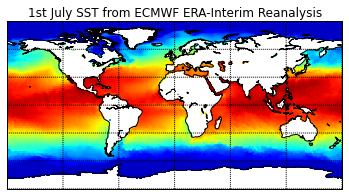

In [6]:
# Plot the data.
plt.figure()
plt.title('1st July SST from ECMWF ERA-Interim Reanalysis')

# Set up a background map with projection 'cyl', specified latitude/longitude boundaries and a coarse resolution.
# Other basemap projections are available here http://matplotlib.org/basemap/users/mapsetup.html

# Now we are going to use another module, `Basemap`, to import a background image of the world. 
# First we create a Basemap object and define its projection. Then we add coastlines and the gridlines.
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()

m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))

# Now we are going to overlay our Sea Surface Temperature data:
m.pcolormesh(lons, lats, SST_1st_July, shading='flat', cmap=plt.cm.jet, latlon=True)
plt.show()

Note that because this example is displayed using the IPython notebook, the plots will display automatically on the page. If you are doing this in Spyder or by running a script manually, you would need to add one of the two lines below to save the figure or make it appear in a window:

### The object-oriented way

Another way is to create figure and axes objects and then set the attribute of those objects:

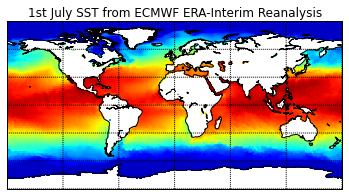

In [7]:
fig = plt.figure()
axes = plt.axes()
axes.set_title('1st July SST from ECMWF ERA-Interim Reanalysis')

m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))

# Now we are going to overlay our Sea Surface Temperature data:
m.pcolormesh(lons, lats, SST_1st_July, shading='flat', cmap=plt.cm.jet, latlon=True)
plt.show()

In [8]:
# Save and display the plot.
plt.savefig("SST_1st_July.png")    # Writes out a png file
plt.show()                         # Displays the plot, usually in a pop up window

## Tasks
1. Plot a colour bar and lat/long on the map.
2. Plot the 2nd, 3rd, and 4th July SSTs on similar maps, keeping them all in the same figure. Aim to get a 2x2 grid of 4 maps on a single figure:

```
+======+======+
|      |      |
| Map1 | Map2 |
|      |      |
+======+======+
|      |      |
| Map3 | Map4 |
|      |      |
+======+======+
```

Is there an easy way to do this? (Think about using a for loop...)

**Feel free to use your own data to make similar plots. You don't have to follow the exercise exactly - experiment!**

Browse the matplotlib gallery for similar examples if you get stuck. Also have a read of the basemap documentation.

# Colour bar and Lat Long

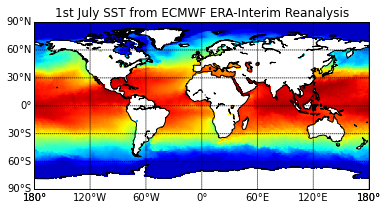

In [9]:
fig = plt.figure()
axes = plt.axes()
axes.set_title('1st July SST from ECMWF ERA-Interim Reanalysis')

m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,99.,30.) ,labels=[True,False,False,True])
m.drawmeridians(np.arange(-180.,180.,60.), labels=[True,False,False,True])

# Now we are going to overlay our Sea Surface Temperature data:
m.pcolormesh(lons, lats, SST_1st_July, shading='flat', cmap=plt.cm.jet, latlon=True)
plt.show()